# Problem Statement 

**Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5 CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.** 

**People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.**   

**Given that heart disease remains the number one global cause of mortality, leveraging data science for its detection and prevention is a step toward saving lives. To prevent heart disease, we must first develop reliable methods to identify it.**

**This dataset originates from a well-known, publicly available heart disease study that has been utilized for research over many years. It comprises various patient health metrics and cardiovascular statistics, with all personally identifiable information anonymized to ensure privacy.**

# Domian Analysis

**patient_id:** Unique and random identifier  

**slope_of_peak_exercise_st_segment:** The slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart   

**thal:** Results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect  

**resting_blood_pressure:** resting blood pressure 

**chest_pain_type:** chest pain type (4 values)  

**num_major_vessels:** number of major vessels (0-3) colored by flourosopy  

**fasting_blood_sugar_gt_120_mg_per_dl:** fasting blood sugar > 120 mg/dl  

**resting_ekg_results:** resting electrocardiographic results (values 0,1,2)  

**serum_cholesterol_mg_per_dl:** serum cholestoral in mg/dl  

**oldpeak_eq_st_depression:** oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms  

**sex:** 0: female, 1: male 

**age:** age in years  

**max_heart_rate_achieved:** maximum heart rate achieved (beats per minute) 

**exercise_induced_angina:** exercise-induced chest pain (0: False, 1: True)  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\chira\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data1 = pd.read_csv('C:/Users/chira/OneDrive/Desktop/Datamites Internship projects/Heart Diesease Prediction/Dataset/values.csv')

In [3]:
data2 = pd.read_csv('C:/Users/chira/OneDrive/Desktop/Datamites Internship projects/Heart Diesease Prediction/Dataset/labels.csv')

In [4]:
df = pd.concat([data1,data2.drop('patient_id',axis=1)],axis=1)

In [5]:
df

patient_id  slope_of_peak_exercise_st_segment               thal  \
0       0z64un                                  1             normal   
1       ryoo3j                                  2             normal   
2       yt1s1x                                  1             normal   
3       l2xjde                                  1  reversible_defect   
4       oyt4ek                                  3  reversible_defect   
..         ...                                ...                ...   
175     5qfar3                                  2  reversible_defect   
176     2s2b1f                                  2             normal   
177     nsd00i                                  2  reversible_defect   
178     0xw93k                                  1             normal   
179     2nx10r                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128                2                  0   
1                       110                3                  0   
2                       125                4                  3   
3                       152                4                  0   
4                       178                1                  0   
..                      ...              ...                ...   
175                     125                4                  2   
176                     180                4                  0   
177                     125                3                  0   
178                     124                3                  2   
179                     160                3                  1   

     fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                       0                    2   
1                                       0                    0   
2                                       0                    2   
3                                       0                    0   
4                                       0                    2   
..                                    ...                  ...   
175                                     1                    0   
176                                     0                    1   
177                                     0                    0   
178                                     1                    0   
179                                     0                    0   

     serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                            308                       0.0    1   45   
1                            214                       1.6    0   54   
2                            304                       0.0    1   77   
3                            223                       0.0    1   40   
4                            270                       4.2    1   59   
..                           ...                       ...  ...  ...   
175                          254                       0.2    1   67   
176                          327                       3.4    0   55   
177                          309                       1.8    1   64   
178                          255                       0.0    1   48   
179                          201                       0.0    0   54   

     max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
0                        170                        0                      0  
1                        158                        0                      0  
2                        162                        1                      1  
3                        181                        0                      1  
4                        145                        0                      0  
..                       ...                      ...                    ...  
175                      163                        0                      1  
176                      117                

## Basic Checks

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [7]:
df.describe()

slope_of_peak_exercise_st_segment  resting_blood_pressure  \
count                         180.000000              180.000000   
mean                            1.550000              131.311111   
std                             0.618838               17.010443   
min                             1.000000               94.000000   
25%                             1.000000              120.000000   
50%                             1.000000              130.000000   
75%                             2.000000              140.000000   
max                             3.000000              180.000000   

       chest_pain_type  num_major_vessels  \
count       180.000000         180.000000   
mean          3.155556           0.694444   
std           0.938454           0.969347   
min           1.000000           0.000000   
25%           3.000000           0.000000   
50%           3.000000           0.000000   
75%           4.000000           1.000000   
max           4.000000           3.000000   

       fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
count                            180.000000           180.000000   
mean                               0.161111             1.050000   
std                                0.368659             0.998742   
min                                0.000000             0.000000   
25%                                0.000000             0.000000   
50%                                0.000000             2.000000   
75%                                0.000000             2.000000   
max                                1.000000             2.000000   

       serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression         sex  \
count                   180.000000                180.000000  180.000000   
mean                    249.211111                  1.010000    0.688889   
std                      52.717969                  1.121357    0.464239   
min                     126.000000                  0.000000    0.000000   
25%                     213.750000                  0.000000    0.000000   
50%                     245.500000                  0.800000    1.000000   
75%                     281.250000                  1.600000    1.000000   
max                     564.000000                  6.200000    1.000000   

              age  max_heart_rate_achieved  exercise_induced_angina  \
count  180.000000               180.000000               180.000000   
mean    54.811111               149.483333                 0.316667   
std      9.334737                22.063513                 0.466474   
min     29.000000                96.000000                 0.000000   
25%     48.000000               132.000000                 0.000000   
50%     55.000000               152.000000                 0.000000   
75%     62.000000               166.250000                 1.000000   
max     77.000000               202.000000                 1.000000   

       heart_disease_present  
count             180.000000  
mean                0.444444  
std                 0.498290  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 1.000000  
max                 1.000000

In [8]:
df.describe(include='O')

patient_id    thal
count         180     180
unique        180       3
top        0z64un  normal
freq            1      98

In [9]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

## Exploratory Data Analyis

## Univariate Analysis

In [10]:
for i in df:
    if len(df[i].unique())<=20:
        print(df[i].value_counts())
        print('#####################################')

1    93
2    75
3    12
Name: slope_of_peak_exercise_st_segment, dtype: int64
#####################################
normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64
#####################################
4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64
#####################################
0    106
1     37
2     23
3     14
Name: num_major_vessels, dtype: int64
#####################################
0    151
1     29
Name: fasting_blood_sugar_gt_120_mg_per_dl, dtype: int64
#####################################
2    94
0    85
1     1
Name: resting_ekg_results, dtype: int64
#####################################
1    124
0     56
Name: sex, dtype: int64
#####################################
0    123
1     57
Name: exercise_induced_angina, dtype: int64
#####################################
0    100
1     80
Name: heart_disease_present, dtype: int64
#####################################


In [11]:
df_cate =[]
for i in df:
    if len(df[i].unique())<=20:
        df_cate.append(i)
df_cate

['slope_of_peak_exercise_st_segment',
 'thal',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'sex',
 'exercise_induced_angina',
 'heart_disease_present']

In [12]:
# Categerical Data 
d1 = df[df_cate]
d1

slope_of_peak_exercise_st_segment               thal  chest_pain_type  \
0                                    1             normal                2   
1                                    2             normal                3   
2                                    1             normal                4   
3                                    1  reversible_defect                4   
4                                    3  reversible_defect                1   
..                                 ...                ...              ...   
175                                  2  reversible_defect                4   
176                                  2             normal                4   
177                                  2  reversible_defect                3   
178                                  1             normal                3   
179                                  1             normal                3   

     num_major_vessels  fasting_blood_sugar_gt_120_mg_per_dl  \
0                    0                                     0   
1                    0                                     0   
2                    3                                     0   
3                    0                                     0   
4                    0                                     0   
..                 ...                                   ...   
175                  2                                     1   
176                  0                                     0   
177                  0                                     0   
178                  2                                     1   
179                  1                                     0   

     resting_ekg_results  sex  exercise_induced_angina  heart_disease_present  
0                      2    1                        0                      0  
1                      0    0                        0                      0  
2                      2    1                        1                      1  
3                      0    1                        0                      1  
4                      2    1                        0                      0  
..                   ...  ...                      ...                    ...  
175                    0    1                        0                      1  
176                    1    0                        1                      1  
177                    0    1                        1                      1  
178                    0    1                        0                      0  
179                    0    0                        0                      0  

[180 rows x 9 columns]

In [13]:
# Numerical Data
d2 = df.drop(df_cate,axis=1)
d2

patient_id  resting_blood_pressure  serum_cholesterol_mg_per_dl  \
0       0z64un                     128                          308   
1       ryoo3j                     110                          214   
2       yt1s1x                     125                          304   
3       l2xjde                     152                          223   
4       oyt4ek                     178                          270   
..         ...                     ...                          ...   
175     5qfar3                     125                          254   
176     2s2b1f                     180                          327   
177     nsd00i                     125                          309   
178     0xw93k                     124                          255   
179     2nx10r                     160                          201   

     oldpeak_eq_st_depression  age  max_heart_rate_achieved  
0                         0.0   45                      170  
1                         1.6   54                      158  
2                         0.0   77                      162  
3                         0.0   40                      181  
4                         4.2   59                      145  
..                        ...  ...                      ...  
175                       0.2   67                      163  
176                       3.4   55                      117  
177                       1.8   64                      131  
178                       0.0   48                      175  
179                       0.0   54                      163  

[180 rows x 6 columns]

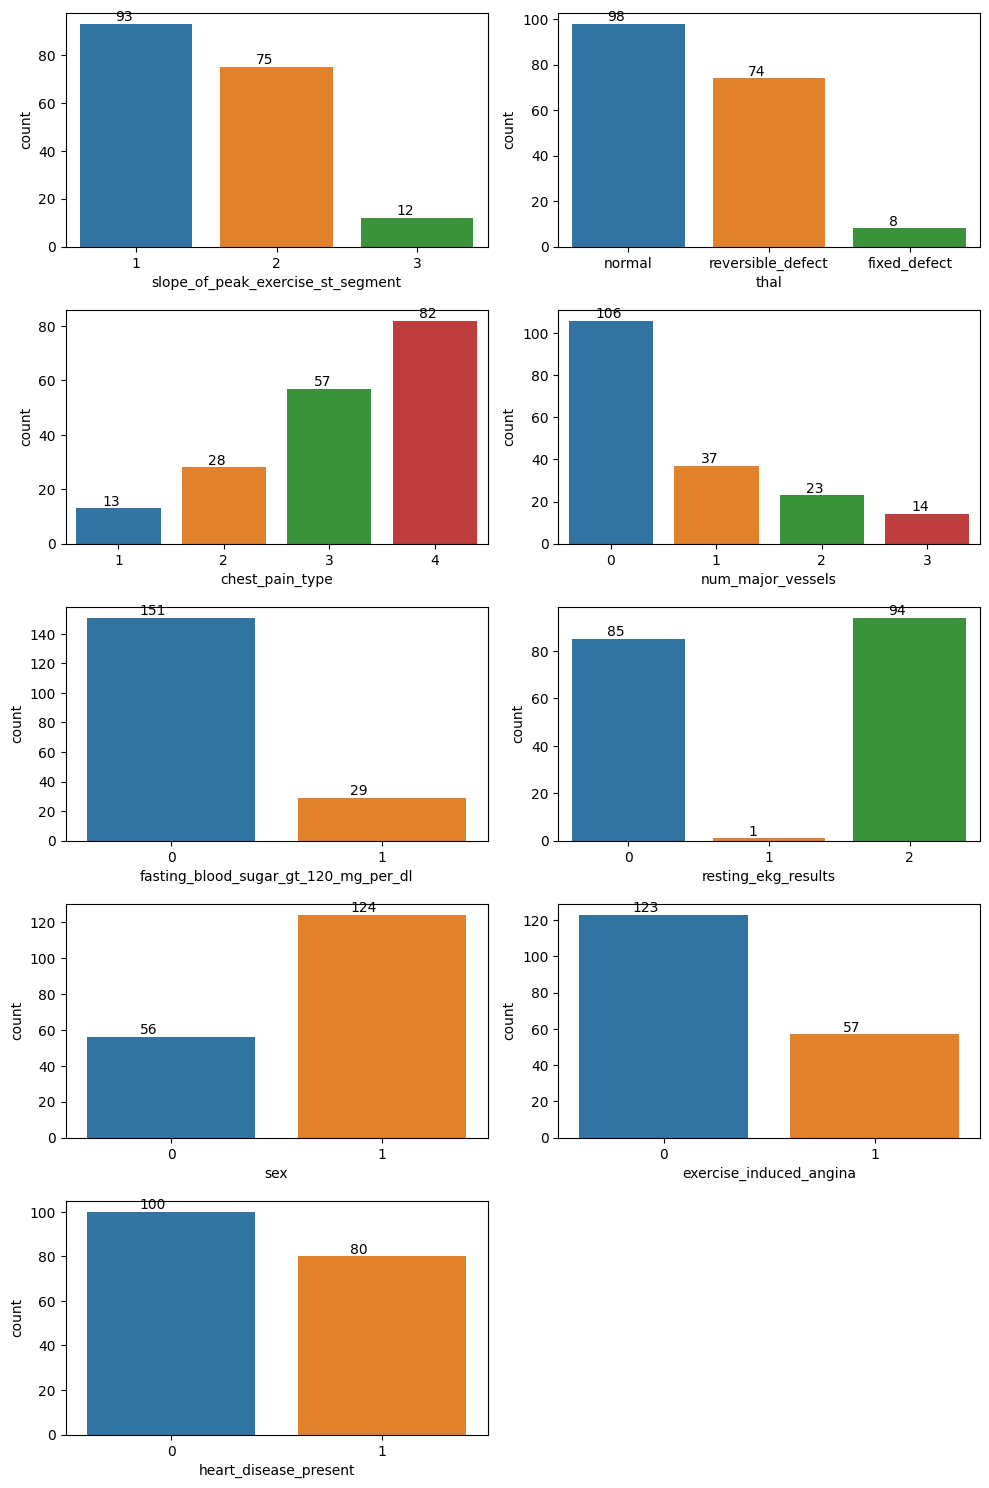

In [14]:
plt.figure(figsize=(10,15))
plotnumber = 1
for i in d1:
    plt.subplot(5,2,plotnumber)
    ax = sns.countplot(x = d1[i])
    plotnumber+=1
    for s in ax.patches:
        ax.annotate(int(s.get_height()),(s.get_x()+0.25,s.get_y()+s.get_height()), va = 'bottom')
plt.tight_layout()

# Insights

## 1) Heart Disease Presence

*100 individuals do not have heart disease, while 80 individuals do. This suggests that the dataset has a fairly balanced distribution of heart disease cases, making it suitable for predictive modeling.*

## 2) Sex Distribution

*There are more male patients (124) compared to female patients (56). This aligns with general trends, as men are at a higher risk of cardiovascular diseases.*

## 3) Chest Pain Type

*Most individuals experienced type 4 chest pain (82 cases), followed by type 3 (57 cases).*

*Type 1 chest pain is the least common (13 cases). Since chest pain type is an important factor in diagnosing heart disease, its distribution may influence the model.*

## 4) Thalassemia (Thal) Distribution

*The majority of cases fall under "normal" (98) and "reversible defect" (74), with very few having a "fixed defect" (8).*

*A reversible defect might indicate an ischemic condition, which is associated with heart disease risk.*

## 5) Slope of Peak Exercise ST Segment

*Most individuals have a slope value of 1 (93 cases) and 2 (75 cases), while very few have a slope of 3 (12 cases).*

*This feature is often linked to heart disease severity and exercise response.*

## 6) Fasting Blood Sugar

*The majority (151) have fasting blood sugar ≤ 120 mg/dL, while 29 have fasting blood sugar > 120 mg/dL.*

*High fasting blood sugar is a known risk factor for heart disease.*

## 7) Number of Major Vessels

*A large proportion of patients have 0 major vessels (106), followed by 1 (37), 2 (23), and 3 (14).*

*This suggests that most individuals in the dataset have relatively fewer major blocked vessels, which is a key diagnostic factor.*

## 8) Resting ECG Results

*The highest number of patients fall under category 2 (94 cases), followed by 0 (85 cases), with very few in category 1 (1 case).*

*This feature can help in identifying abnormalities in heart function.*

## 9) Exercise-Induced Angina

*123 individuals did not experience angina, while 57 did.*

*Exercise-induced angina is often a sign of underlying coronary artery disease.*

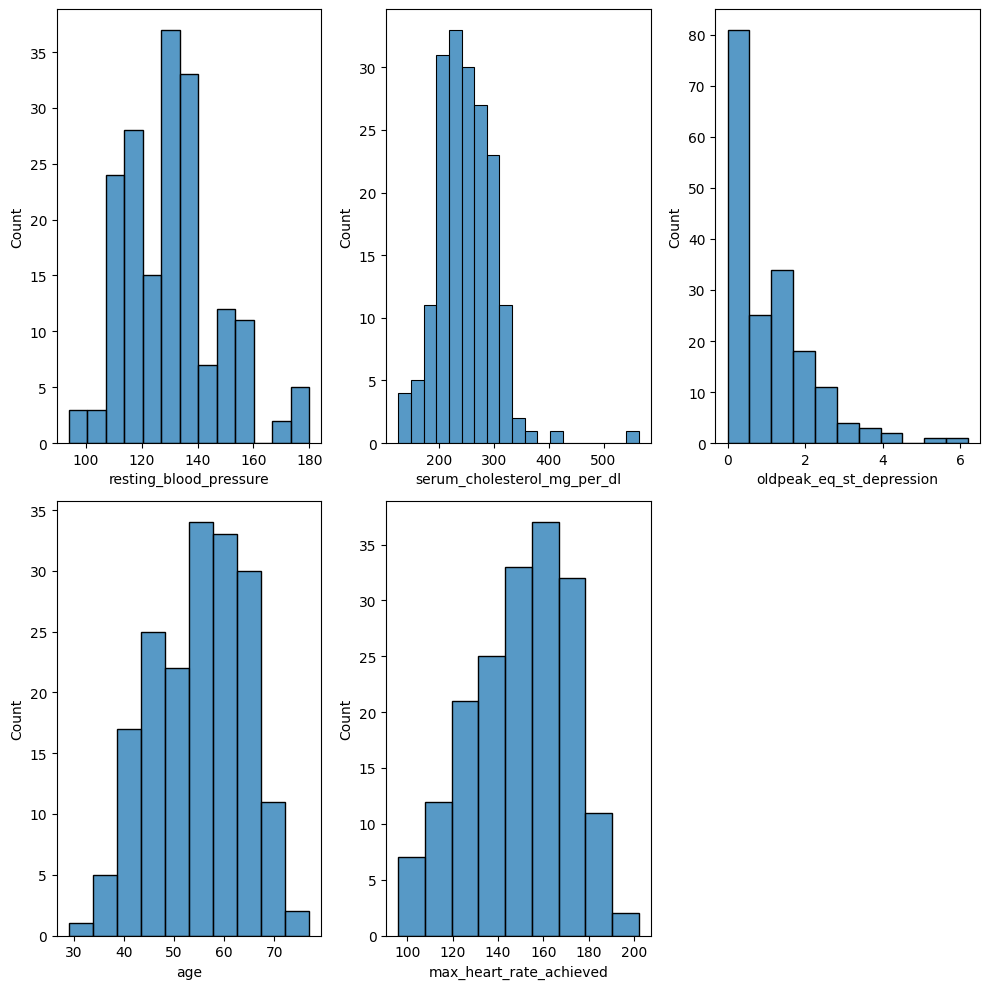

In [15]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in d2.drop('patient_id',axis=1):
    plt.subplot(2,3,plotnumber)
    sns.histplot(x = d2[i])
    plotnumber+=1
plt.tight_layout()

# Insights

## 1) Resting Blood Pressure

*Most individuals have a resting blood pressure between 120-140 mm Hg, which is within the prehypertensive or hypertensive range.*

*A few cases exceed 160 mmHg, indicating potential severe hypertension.*

## 2) Serum Cholesterol (mg/dL)

*The majority of individuals have cholesterol levels between 200-300 mg/dL, with a peak around 250 mg/dL.*

*A small number of individuals have very high cholesterol levels exceeding 400 mg/dL, which is a significant risk factor for heart disease.*

## 3) ST Depression (Oldpeak - Exercise-Induced Depression)

*The distribution is right-skewed, meaning most values are close to 0, with a few cases reaching 5-6.*

*Higher values indicate more significant ST depression, which is a strong predictor of ischemic heart disease.*

## 4) Age Distribution

*Most individuals fall in the 40-65 age range, which is the typical age bracket for higher heart disease risk.*

*Very few individuals are younger than 30 or older than 70.*

## 5) Maximum Heart Rate Achieved

*The highest frequency is around 150-170 bpm, which is within a normal exercise range for middle-aged individuals.*

*A few individuals have maximum heart rates exceeding 180 bpm, which may indicate higher cardiovascular fitness or stress during testing.*

## Bivariate Anaylsis

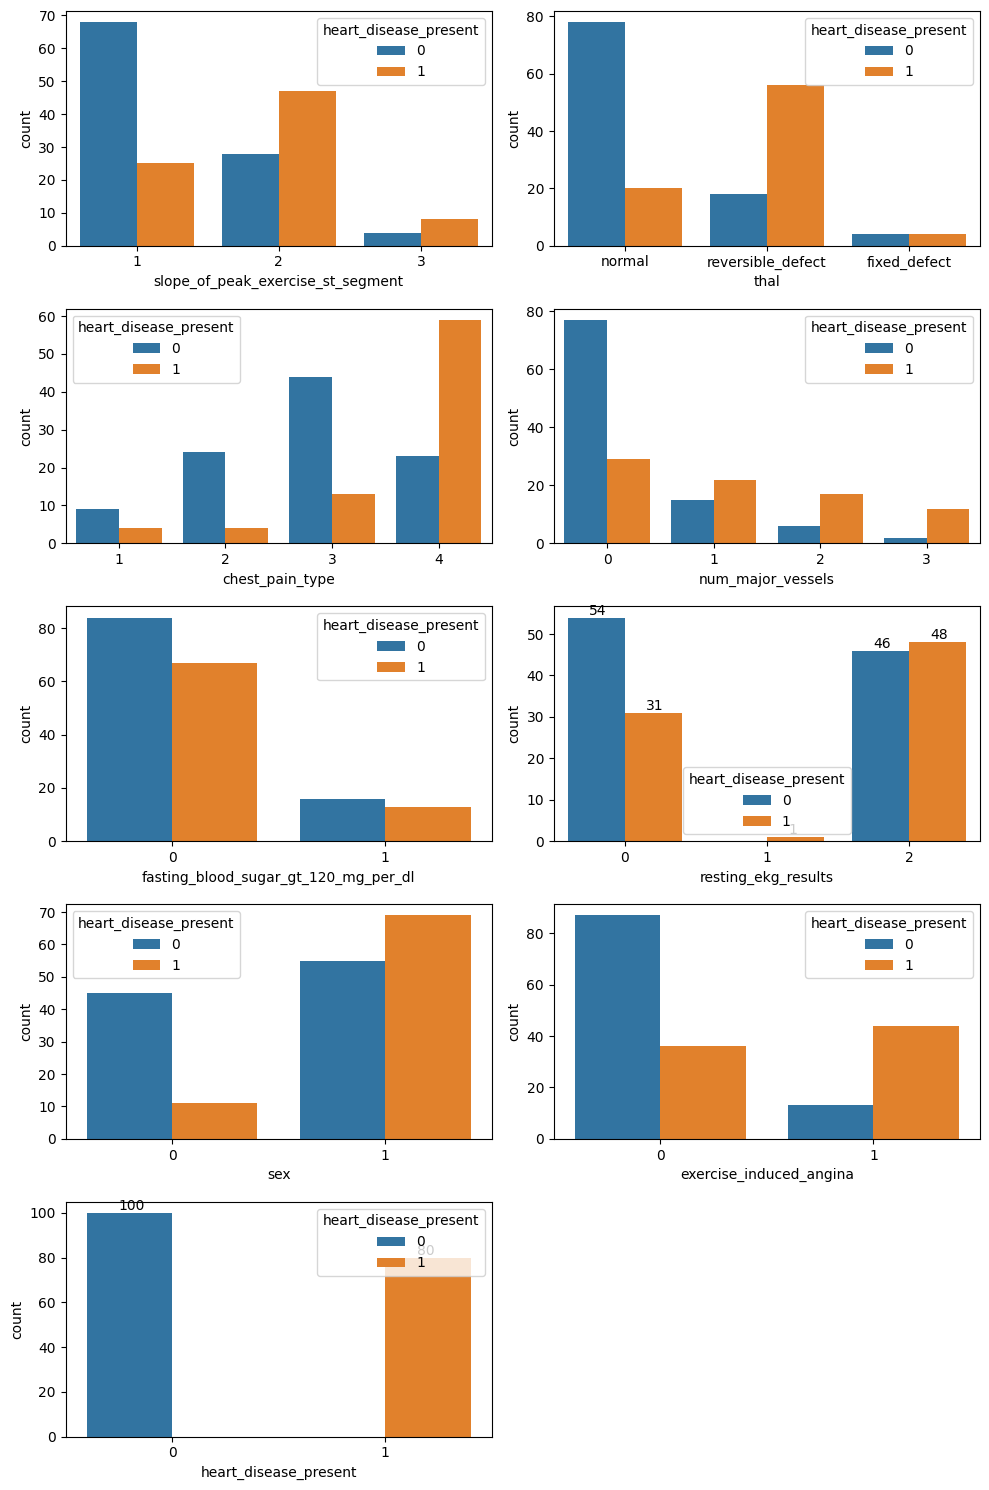

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 15))
plotnumber = 1

for i in d1:
    plt.subplot(5, 2, plotnumber)
    ax = sns.countplot(x=d1[i], hue=df.heart_disease_present)
    plotnumber += 1
    
    for s in ax.patches:
        height = s.get_height()
        if isinstance(height, (int, float)) and not pd.isna(height):  # Ensure height is valid
            ax.annotate(f"{int(height)}", (s.get_x() + 0.15, height), va='bottom')

plt.tight_layout()
plt.show()


# Insights

## 1) Slope of Peak Exercise ST Segment

*Most people with heart disease (orange bars) have slope type 2.*

*People with slope type 1 are more likely to be free of heart disease.*

## 2) Thalassemia (thal)

*Reversible defects are more common among heart disease patients.*

*Normal thal values are more frequent in those without heart disease.*

## 3) Chest Pain Type

*Chest pain type 4 is strongly associated with heart disease.*

*Type 3 and Type 2 have a mix of healthy and heart disease cases.*

*Type 1 is very rare.*

## 4) Number of Major Vessels

*More heart disease cases are found in people with more major vessels affected.*

*Most healthy people have 0 major vessels.*

## 5) Fasting Blood Sugar (>120 mg/dl)

*Majority of people have normal fasting blood sugar.*

*Higher fasting blood sugar is slightly more common in heart disease cases.*

## 6) Resting ECG Results

*Type 2 ECG readings are slightly more associated with heart disease.*

*Type 0 is more common among healthy individuals.*

## 7) Sex

*More men are affected by heart disease than women.*

*The number of healthy women is higher compared to women with heart disease.*

## 8) Exercise-Induced Angina

*More people without heart disease have no exercise-induced angina (0).*

*Angina during exercise is a strong indicator of heart disease.*

## 9) Heart Disease Presence

*The dataset has a good balance between those with and without heart disease, though slightly more healthy individuals.*

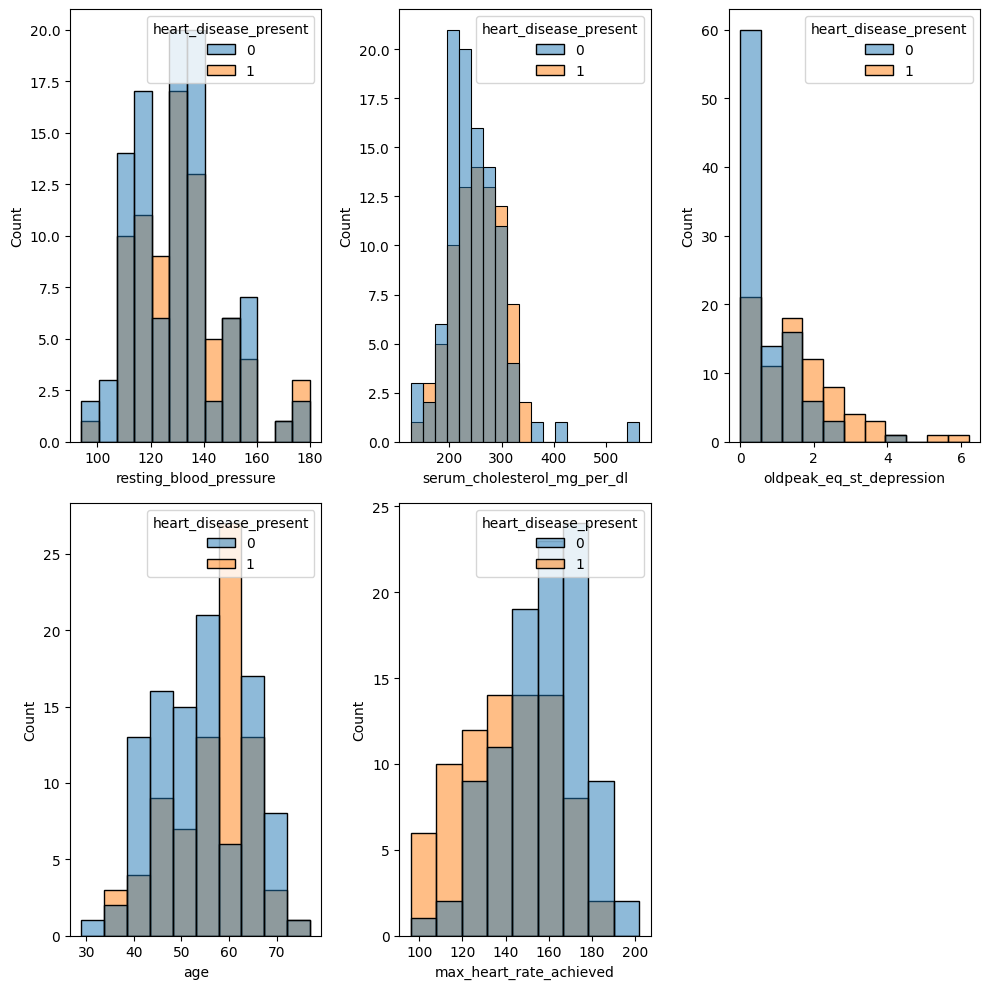

In [17]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in d2.drop('patient_id',axis=1):
    plt.subplot(2,3,plotnumber)
    sns.histplot(x = d2[i],hue=df.heart_disease_present)
    plotnumber+=1
plt.tight_layout()

# Insights

## 1) Resting Blood Pressure

*People with heart disease (orange) generally have higher resting blood pressure than those without heart disease (blue).*

*Most values cluster around 120-140 mm Hg.*

## 2) Serum Cholesterol (mg/dl)

*Cholesterol levels do not show a strong distinction between heart disease and non-heart disease cases.*

*Both distributions peak around 200-250 mg/dl.*

## 3) Oldpeak (ST Depression)

*Higher ST depression (oldpeak) values seem more frequent in people with heart disease.*

*This suggests exercise-induced ischemia is a strong indicator of heart disease.*

## 4) Age

*Heart disease cases are most frequent around ages 50-60.*

*Younger individuals (below 40) have fewer cases of heart disease.*

## 5) Maximum Heart Rate Achieved

*People without heart disease tend to achieve higher maximum heart rates (above 160 bpm).*

*People with heart disease mostly have lower max heart rates.*

# Data Preprocessing

## Handling Null Values

In [18]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

## Handling Outliers

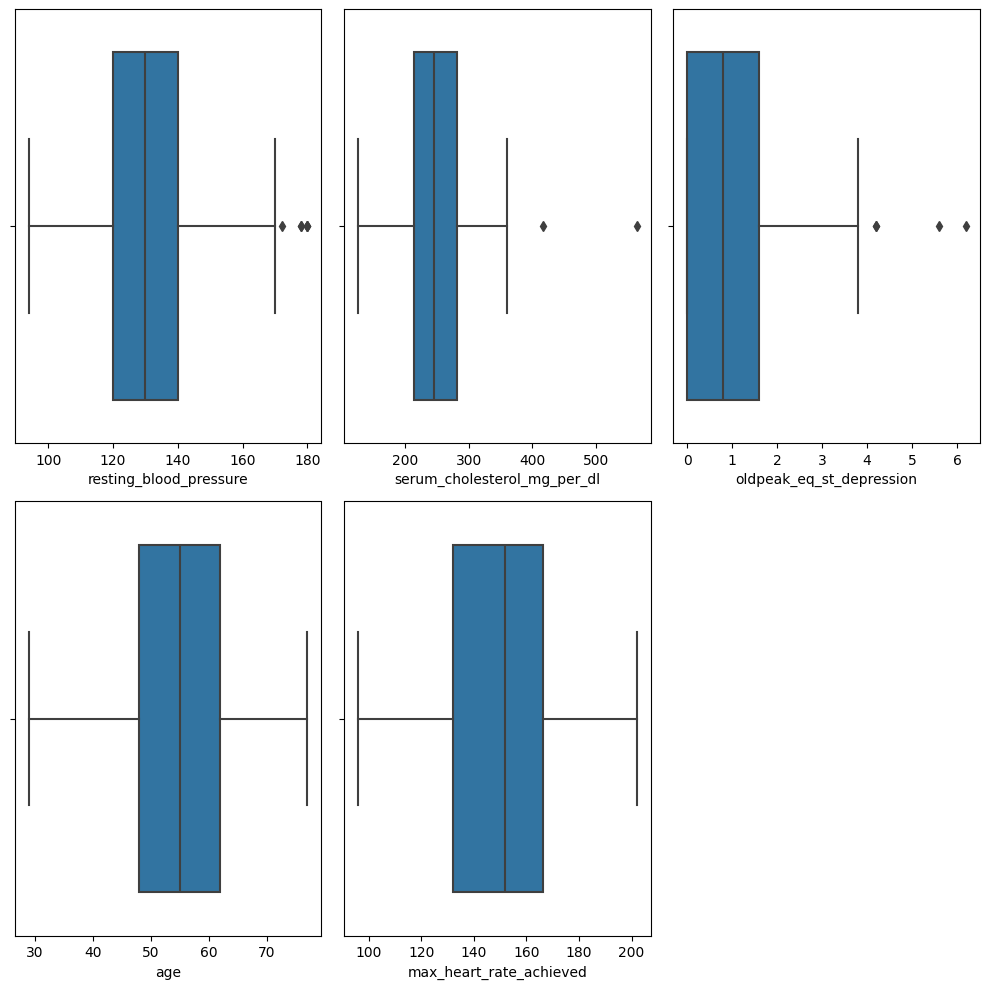

In [19]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in d2.drop('patient_id',axis=1):
    plt.subplot(2,3,plotnumber)
    sns.boxplot(x = d2[i])
    plotnumber+=1
plt.tight_layout()

# Insights

## 1) Resting Blood Pressure

*Most values fall between 110 and 140 mm Hg.*

*A few outliers above 160 mm Hg.*

## 2) Serum Cholesterol (mg/dl)

*The majority of values are within 200-300 mg/dl.*

*A few extreme outliers around 400-500 mg/dl.*

## 3) Oldpeak (ST Depression)

*Most values lie between 0 and 3.*

*Several high-value outliers (above 4), indicating significant ST depression in certain cases.*

## 4) Age

*The data covers individuals aged 30 to 70, with a median around 50-55 years.*

*No extreme outliers observed.*

## 5) Maximum Heart Rate Achieved

*Values range from 100 to 200 bpm, with a median around 150 bpm.*

*No significant outliers.*

## Lower Threshold for Resting Blood Pressure (Outlier Detection)

In [20]:
min_rbp = np.mean(df.resting_blood_pressure) - 2.7*np.std(df.resting_blood_pressure)
min_rbp

85.51067006519976

In [21]:
max_rbp = np.mean(df.resting_blood_pressure) + 2.7*np.std(df.resting_blood_pressure)
max_rbp

177.11155215702246

In [22]:
df.loc[(df.resting_blood_pressure>max_rbp)|(df.resting_blood_pressure<min_rbp),
         'resting_blood_pressure'] = np.median(df.resting_blood_pressure)

<Axes: xlabel='resting_blood_pressure'>

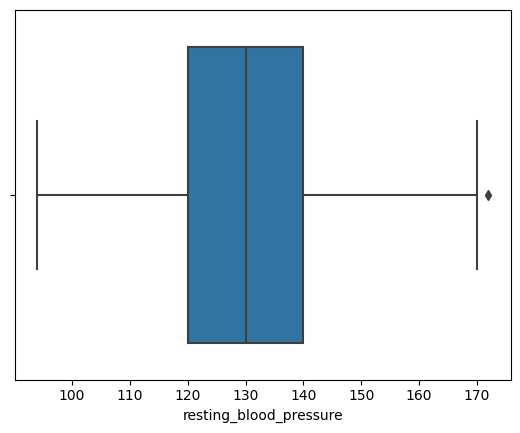

In [23]:
sns.boxplot(x = df.resting_blood_pressure)

## Upper Threshold for Serum Cholesterol (Outlier Detection)

In [24]:
max_rbp = np.mean(df.serum_cholesterol_mg_per_dl) + 2.7*np.std(df.serum_cholesterol_mg_per_dl)
max_rbp

391.15369140328414

In [25]:
max_rbp = np.mean(df.serum_cholesterol_mg_per_dl) + 2.7*np.std(df.serum_cholesterol_mg_per_dl)
max_rbp

391.15369140328414

In [26]:
df.loc[(df.serum_cholesterol_mg_per_dl>max_rbp)|(df.serum_cholesterol_mg_per_dl<min_rbp),
         'serum_cholesterol_mg_per_dl'] = np.median(df.serum_cholesterol_mg_per_dl)

<Axes: xlabel='serum_cholesterol_mg_per_dl'>

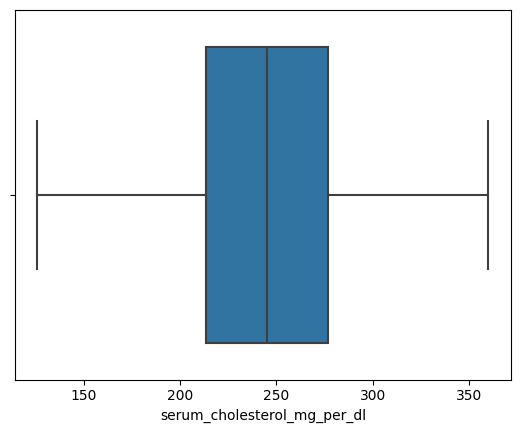

In [27]:
sns.boxplot(df.serum_cholesterol_mg_per_dl)

## Upper Threshold for ST Depression (Outlier Detection)

In [28]:
max_rbp = np.mean(df.oldpeak_eq_st_depression) + 2.7*np.std(df.oldpeak_eq_st_depression)
max_rbp

4.029241792238576

In [29]:
df.loc[df.oldpeak_eq_st_depression>max_rbp,'oldpeak_eq_st_depression'] = np.median(df.oldpeak_eq_st_depression)

<Axes: xlabel='oldpeak_eq_st_depression'>

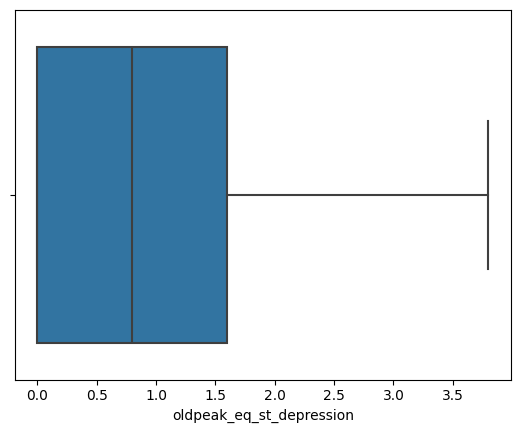

In [30]:
sns.boxplot(x = df.oldpeak_eq_st_depression)

## Converting Categerical data to Numerical data

In [31]:
df.describe(include='O')

patient_id    thal
count         180     180
unique        180       3
top        0z64un  normal
freq            1      98

In [32]:
df.thal.value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [33]:
df.loc[df.thal == 'normal','thal'] = 2
df.loc[df.thal == 'reversible_defect','thal'] = 1
df.loc[df.thal == 'fixed_defect','thal'] = 0

In [34]:
df.thal.value_counts()

2    98
1    74
0     8
Name: thal, dtype: int64

In [35]:
df['thal'] = df.thal.astype(np.int64)

## Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
mn = MinMaxScaler()

In [38]:
df

patient_id  slope_of_peak_exercise_st_segment  thal  \
0       0z64un                                  1     2   
1       ryoo3j                                  2     2   
2       yt1s1x                                  1     2   
3       l2xjde                                  1     1   
4       oyt4ek                                  3     1   
..         ...                                ...   ...   
175     5qfar3                                  2     1   
176     2s2b1f                                  2     2   
177     nsd00i                                  2     1   
178     0xw93k                                  1     2   
179     2nx10r                                  1     2   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128                2                  0   
1                       110                3                  0   
2                       125                4                  3   
3                       152                4                  0   
4                       130                1                  0   
..                      ...              ...                ...   
175                     125                4                  2   
176                     130                4                  0   
177                     125                3                  0   
178                     124                3                  2   
179                     160                3                  1   

     fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                       0                    2   
1                                       0                    0   
2                                       0                    2   
3                                       0                    0   
4                                       0                    2   
..                                    ...                  ...   
175                                     1                    0   
176                                     0                    1   
177                                     0                    0   
178                                     1                    0   
179                                     0                    0   

     serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                          308.0                       0.0    1   45   
1                          214.0                       1.6    0   54   
2                          304.0                       0.0    1   77   
3                          223.0                       0.0    1   40   
4                          270.0                       0.8    1   59   
..                           ...                       ...  ...  ...   
175                        254.0                       0.2    1   67   
176                        327.0                       3.4    0   55   
177                        309.0                       1.8    1   64   
178                        255.0                       0.0    1   48   
179                        201.0                       0.0    0   54   

     max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
0                        170                        0                      0  
1                        158                        0                      0  
2                        162                        1                      1  
3                        181                        0                      1  
4                        145                        0                      0  
..                       ...                      ...                    ...  
175                      163                        0                      1  
176                      117                        1                      1  
177                      131                        1                      1  
178                      175              

In [39]:
df.resting_blood_pressure = mn.fit_transform(df[['resting_blood_pressure']])

In [40]:
df.resting_blood_pressure

0      0.435897
1      0.205128
2      0.397436
3      0.743590
4      0.461538
         ...   
175    0.397436
176    0.461538
177    0.397436
178    0.384615
179    0.846154
Name: resting_blood_pressure, Length: 180, dtype: float64

In [41]:
df.serum_cholesterol_mg_per_dl = mn.fit_transform(df[['serum_cholesterol_mg_per_dl']])

In [42]:
df.age = mn.fit_transform(df[['age']])

In [43]:
df.max_heart_rate_achieved = mn.fit_transform(df[['max_heart_rate_achieved']])

## Feature Selection 

In [44]:
d2.drop('patient_id',axis=1).corr()

resting_blood_pressure  \
resting_blood_pressure                     1.000000   
serum_cholesterol_mg_per_dl                0.144881   
oldpeak_eq_st_depression                   0.219026   
age                                        0.284402   
max_heart_rate_achieved                   -0.017521   

                             serum_cholesterol_mg_per_dl  \
resting_blood_pressure                          0.144881   
serum_cholesterol_mg_per_dl                     1.000000   
oldpeak_eq_st_depression                       -0.021932   
age                                             0.236211   
max_heart_rate_achieved                        -0.071038   

                             oldpeak_eq_st_depression       age  \
resting_blood_pressure                       0.219026  0.284402   
serum_cholesterol_mg_per_dl                 -0.021932  0.236211   
oldpeak_eq_st_depression                     1.000000  0.189700   
age                                          0.189700  1.000000   
max_heart_rate_achieved                     -0.341045 -0.394630   

                             max_heart_rate_achieved  
resting_blood_pressure                     -0.017521  
serum_cholesterol_mg_per_dl                -0.071038  
oldpeak_eq_st_depression                   -0.341045  
age                                        -0.394630  
max_heart_rate_achieved                     1.000000

## Correlation Heatmap

<Axes: >

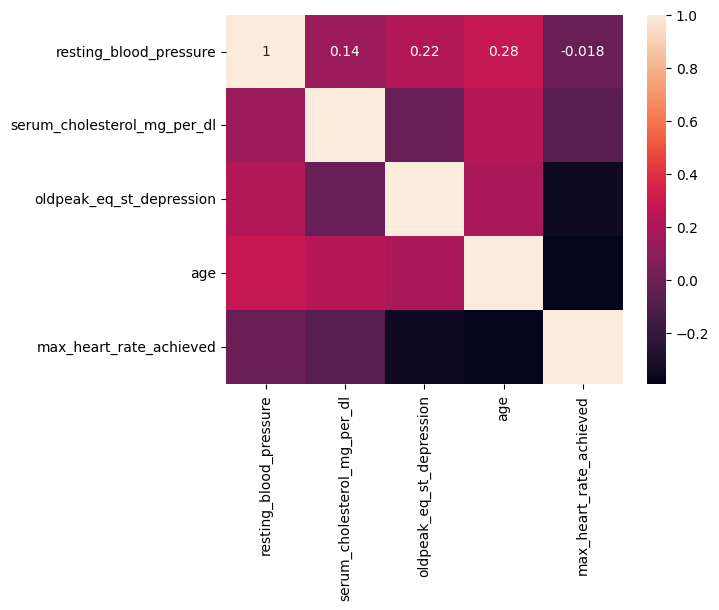

In [45]:
sns.heatmap(d2.drop('patient_id',axis=1).corr(),annot=True)

# Insights

## 1) Age vs. Max Heart Rate Achieved (-0.39 Correlation)

*There is a moderate negative correlation between age and maximum heart rate achieved, meaning that as age increases, the maximum heart rate tends to decrease. This aligns with known physiological trends.*

## 2) Oldpeak (ST Depression) vs. Max Heart Rate Achieved (-0.34 Correlation)

*A negative correlation suggests that higher ST depression values (indicative of ischemia) are associated with lower maximum heart rate achieved. This could indicate that individuals with more severe cardiac stress responses tend to achieve lower heart rates.*

## 3) Resting Blood Pressure vs. Age (0.28 Correlation)

*There is a weak to moderate positive correlation between age and resting blood pressure, suggesting that blood pressure tends to increase with age. This is a common trend due to arterial stiffness and other age-related cardiovascular changes.*

## Model Creation

In [46]:
x = df.drop(['patient_id','heart_disease_present'],axis=1)
y = df.heart_disease_present

In [47]:
x.shape

(180, 13)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [50]:
y_train.value_counts()

0    81
1    54
Name: heart_disease_present, dtype: int64

In [51]:
y_test.value_counts()

1    26
0    19
Name: heart_disease_present, dtype: int64

## Balancing 

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
sm = SMOTE()

In [54]:
x_sm,y_sm = sm.fit_resample(x_train,y_train)

In [55]:
y_sm.value_counts()

0    81
1    81
Name: heart_disease_present, dtype: int64

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score

## Logistic Regression

In [57]:
lr = LogisticRegression()

In [58]:
lr.fit(x_sm,y_sm)

LogisticRegression()

In [59]:
y_predit_lr = lr.predict(x_test)
y_predit_lr

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [60]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_lr),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_lr))

Test Score

accuracy_score 0.8222222222222222 

classification_report
               precision    recall  f1-score   support

           0       0.72      0.95      0.82        19
           1       0.95      0.73      0.83        26

    accuracy                           0.82        45
   macro avg       0.83      0.84      0.82        45
weighted avg       0.85      0.82      0.82        45



In [61]:
y_predit_lr_train = lr.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_lr_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_lr_train))

Train Score

accuracy_score 0.8814814814814815 

classification_report
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        81
           1       0.83      0.89      0.86        54

    accuracy                           0.88       135
   macro avg       0.87      0.88      0.88       135
weighted avg       0.88      0.88      0.88       135



## SVM

In [62]:
svm = SVC()

In [63]:
svm.fit(x_sm,y_sm)

SVC()

In [64]:
y_predit_svm = svm.predict(x_test)
y_predit_svm

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [65]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_svm),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_svm))

Test Score

accuracy_score 0.8888888888888888 

classification_report
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.81      0.89        26

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.89        45
weighted avg       0.91      0.89      0.89        45



In [66]:
y_predit_svm_train = svm.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_svm_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_svm_train))

Train Score

accuracy_score 0.9037037037037037 

classification_report
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        81
           1       0.87      0.89      0.88        54

    accuracy                           0.90       135
   macro avg       0.90      0.90      0.90       135
weighted avg       0.90      0.90      0.90       135



## KNN

In [67]:
knn = KNeighborsClassifier(n_neighbors=5)

In [68]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [69]:
y_predit_knn = knn.predict(x_test)
y_predit_knn 

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [70]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_knn),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_knn))

Test Score

accuracy_score 0.8222222222222222 

classification_report
               precision    recall  f1-score   support

           0       0.70      1.00      0.83        19
           1       1.00      0.69      0.82        26

    accuracy                           0.82        45
   macro avg       0.85      0.85      0.82        45
weighted avg       0.87      0.82      0.82        45



In [71]:
y_predit_knn_train = knn.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_knn_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_knn_train))

Train Score

accuracy_score 0.8666666666666667 

classification_report
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        81
           1       0.89      0.76      0.82        54

    accuracy                           0.87       135
   macro avg       0.87      0.85      0.86       135
weighted avg       0.87      0.87      0.86       135



## Decision Tree 

In [72]:
dt = DecisionTreeClassifier(random_state=42)

In [73]:
dt.fit(x_sm,y_sm)

DecisionTreeClassifier(random_state=42)

In [74]:
y_predit_dt = dt.predict(x_test)
y_predit_dt

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1], dtype=int64)

In [75]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_dt),'\n')
print('classification_report\n',classification_report(y_test,y_predit_dt))

Test Score

accuracy_score 0.7333333333333333 

classification_report
               precision    recall  f1-score   support

           0       0.68      0.68      0.68        19
           1       0.77      0.77      0.77        26

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45



In [76]:
y_predit_dt_train = dt.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_dt_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_dt_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## Bagging using Decision Tree

In [77]:
model_bagg = BaggingClassifier(base_estimator=dt, n_estimators=30,random_state=15)

model_bagg.fit(x_sm,y_sm)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=30, random_state=15)

In [78]:
y_predit_bagg = model_bagg.predict(x_test)

In [79]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_bagg),'\n')
print('classification_report\n',classification_report(y_test,y_predit_bagg))

Test Score

accuracy_score 0.8444444444444444 

classification_report
               precision    recall  f1-score   support

           0       0.75      0.95      0.84        19
           1       0.95      0.77      0.85        26

    accuracy                           0.84        45
   macro avg       0.85      0.86      0.84        45
weighted avg       0.87      0.84      0.85        45



In [80]:
y_predit_bagg_train = dt.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_bagg_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_bagg_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## Random Forest 

In [81]:
rf = RandomForestClassifier(n_estimators=200,random_state=52)

In [82]:
rf.fit(x_sm,y_sm)

RandomForestClassifier(n_estimators=200, random_state=52)

In [83]:
y_predit_rf = rf.predict(x_test)
y_predit_rf

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [84]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_rf),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_rf))

Test Score

accuracy_score 0.8666666666666667 

classification_report
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       1.00      0.77      0.87        26

    accuracy                           0.87        45
   macro avg       0.88      0.88      0.87        45
weighted avg       0.90      0.87      0.87        45



In [85]:
y_predit_rf_train = rf.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_rf_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_rf_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## Hyperparameter Tuning using Random Forest

In [86]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [87]:
grid_search = RandomizedSearchCV(rf, random_grid, cv=5, scoring='accuracy',random_state=23)


In [88]:
grid_search.fit(x_sm,y_sm)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=200,
                                                    random_state=52),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=23, scoring='accuracy')

In [89]:
grid_search.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [90]:
rf_hyp = RandomForestClassifier( n_estimators = 800,
  min_samples_split = 5,
  min_samples_leaf = 1,
  max_features =  'auto' ,
  max_depth = 10,
  bootstrap = False)

In [91]:
rf_hyp.fit(x_sm,y_sm)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=5,
                       n_estimators=800)

In [92]:
y_predit_rf_hyp = rf_hyp.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_rf_hyp),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_rf_hyp))

Test Score

accuracy_score 0.8222222222222222 

classification_report
               precision    recall  f1-score   support

           0       0.72      0.95      0.82        19
           1       0.95      0.73      0.83        26

    accuracy                           0.82        45
   macro avg       0.83      0.84      0.82        45
weighted avg       0.85      0.82      0.82        45



In [93]:
rf_hyp_train = rf_hyp.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,rf_hyp_train),'\n')
print('classification_report\n',classification_report(y_train,rf_hyp_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## Gradient Boosting

In [94]:
gb = GradientBoostingClassifier()

In [95]:
gb.fit(x_sm,y_sm)

GradientBoostingClassifier()

In [96]:
y_predit_gb = gb.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_gb),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_gb))

Test Score

accuracy_score 0.8222222222222222 

classification_report
               precision    recall  f1-score   support

           0       0.72      0.95      0.82        19
           1       0.95      0.73      0.83        26

    accuracy                           0.82        45
   macro avg       0.83      0.84      0.82        45
weighted avg       0.85      0.82      0.82        45



In [97]:
y_predit_gb_train = gb.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_gb_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_gb_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## XGBoost

In [98]:
xgb = XGBClassifier()

In [99]:
xgb.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [100]:
y_predit_xgb = xgb.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_xgb),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_xgb))

Test Score

accuracy_score 0.8444444444444444 

classification_report
               precision    recall  f1-score   support

           0       0.75      0.95      0.84        19
           1       0.95      0.77      0.85        26

    accuracy                           0.84        45
   macro avg       0.85      0.86      0.84        45
weighted avg       0.87      0.84      0.85        45



In [101]:
xgb_train = xgb.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,xgb_train),'\n')
print('classification_report\n',classification_report(y_train,xgb_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## Hyperparameter Tuning XGBoost

In [102]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

In [ ]:
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)

In [104]:
random_search.fit(x_sm,y_sm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=No

In [105]:
random_search.best_params_

{'subsample': 0.9,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.3,
 'gamma': 5,
 'colsample_bytree': 1.0}

In [106]:
xgb_hyp = XGBClassifier(subsample = 0.8,
  n_estimators = 200,
  min_child_weight = 1,
  max_depth = 4,
  learning_rate = 0.01,
  gamma = 0,
  colsample_bytree = 1.0)

In [107]:
xgb_hyp.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [108]:
y_predit_xgb_hyp = xgb_hyp.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_xgb_hyp),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_xgb))

Test Score

accuracy_score 0.8222222222222222 

classification_report
               precision    recall  f1-score   support

           0       0.75      0.95      0.84        19
           1       0.95      0.77      0.85        26

    accuracy                           0.84        45
   macro avg       0.85      0.86      0.84        45
weighted avg       0.87      0.84      0.85        45



In [109]:
xgb_train = xgb_hyp.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,xgb_train),'\n')
print('classification_report\n',classification_report(y_train,xgb_train))

Train Score

accuracy_score 0.9555555555555556 

classification_report
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        81
           1       0.98      0.91      0.94        54

    accuracy                           0.96       135
   macro avg       0.96      0.95      0.95       135
weighted avg       0.96      0.96      0.96       135



# Implementaion of some more models like: AdaBoost, Extra Trees, CatBoost, and LightGBM Models

In [116]:
!pip install catboost

In [ ]:
!pip install lightgbm

In [118]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Initialize new models
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
extra_trees = ExtraTreesClassifier(n_estimators=200, random_state=42)
catboost = CatBoostClassifier(iterations=200, depth=4, learning_rate=0.1, verbose=0, random_seed=42)
lgbm = LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)

# Train new models
ada.fit(x_sm, y_sm)
extra_trees.fit(x_sm, y_sm)
catboost.fit(x_sm, y_sm)
lgbm.fit(x_sm, y_sm)

# Predictions
y_pred_ada = ada.predict(x_test)
y_pred_extra_trees = extra_trees.predict(x_test)
y_pred_catboost = catboost.predict(x_test)
y_pred_lgbm = lgbm.predict(x_test)

# Print accuracy scores
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Extra Trees Accuracy:", accuracy_score(y_test, y_pred_extra_trees))
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_catboost))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 81, number of negative: 81
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 162, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

## Implemented some more models also for checking performance of best model for our dataset: Gaussian Naive Bayes (GaussianNB), Gradient Boosting Machine (GBM), Histogram-based Gradient Boosting (HistGradientBoostingClassifier) and Stacking Classifier (Combining Multiple Models)

In [119]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize new models
gnb = GaussianNB()
gbm = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
hist_gbm = HistGradientBoostingClassifier(max_iter=200, learning_rate=0.1, max_depth=4, random_state=42)

# Stacking Classifier
stacking = StackingClassifier(
    estimators=[('gbm', gbm), ('hist_gbm', hist_gbm), ('gnb', gnb)],
    final_estimator=LogisticRegression(),
    passthrough=True
)

# Train new models
gnb.fit(x_sm, y_sm)
gbm.fit(x_sm, y_sm)
hist_gbm.fit(x_sm, y_sm)
stacking.fit(x_sm, y_sm)

# Predictions
y_pred_gnb = gnb.predict(x_test)
y_pred_gbm = gbm.predict(x_test)
y_pred_hist_gbm = hist_gbm.predict(x_test)
y_pred_stacking = stacking.predict(x_test)

# Print accuracy scores
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gbm))
print("HistGradient Boosting Accuracy:", accuracy_score(y_test, y_pred_hist_gbm))
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stacking))


GaussianNB Accuracy: 0.8222222222222222
Gradient Boosting Accuracy: 0.8
HistGradient Boosting Accuracy: 0.8666666666666667
Stacking Classifier Accuracy: 0.8444444444444444


# Conclusions

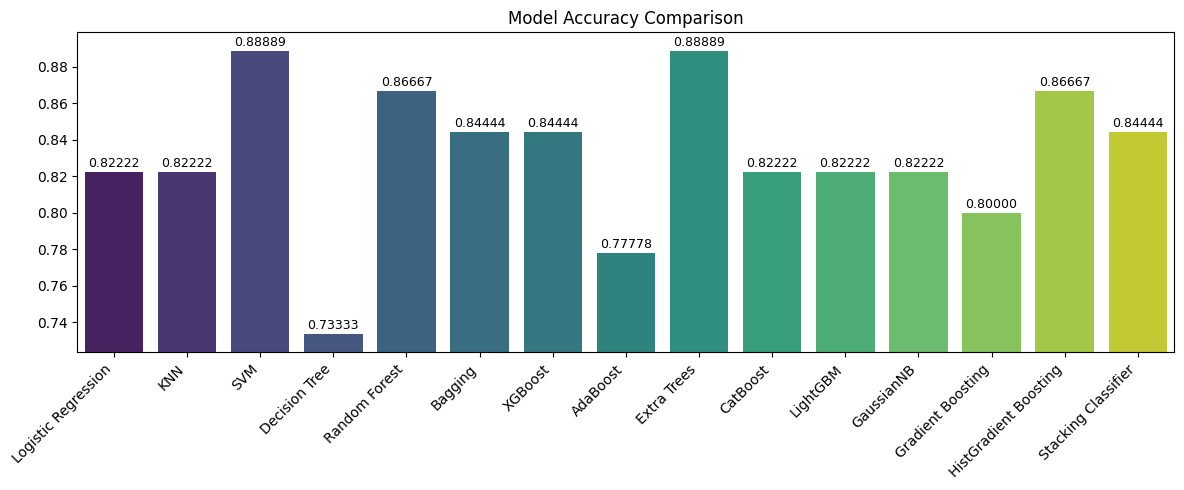

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Define models and choose best accuracy (before or after tuning)
models = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Bagging', 'XGBoost',
          'AdaBoost', 'Extra Trees', 'CatBoost', 'LightGBM', 'GaussianNB', 'Gradient Boosting', 'HistGradient Boosting', 'Stacking Classifier']

accuracy_scores = [
    accuracy_score(y_test, y_predit_lr),  # Logistic Regression (no tuning)
    accuracy_score(y_test, y_predit_knn),  # KNN (no tuning)
    accuracy_score(y_test, y_predit_svm),  # SVM (no tuning)
    accuracy_score(y_test, y_predit_dt),  # Decision Tree (no tuning)
    max(accuracy_score(y_test, y_predit_rf), accuracy_score(y_test, y_predit_rf_hyp)), # Random Forest
    accuracy_score(y_test, y_predit_bagg),  # Bagging (no tuning)
    max(accuracy_score(y_test, y_predit_xgb), accuracy_score(y_test, y_predit_xgb_hyp)), # XGBoost
    accuracy_score(y_test, y_pred_ada),  # AdaBoost
    accuracy_score(y_test, y_pred_extra_trees),  # Extra Trees
    accuracy_score(y_test, y_pred_catboost),  # CatBoost
    accuracy_score(y_test, y_pred_lgbm),  # LightGBM
    accuracy_score(y_test, y_pred_gnb),  # GaussianNB
    accuracy_score(y_test, y_pred_gbm),  # Gradient Boosting Machine
    accuracy_score(y_test, y_pred_hist_gbm),  # Histogram-based Gradient Boosting
    accuracy_score(y_test, y_pred_stacking)  # Stacking Classifier
]

# Plot the accuracy scores
plt.figure(figsize=(12, 5))
bar_plot = sns.barplot(x=models, y=accuracy_scores, palette="viridis")

# Add labels to each bar
for index, value in enumerate(accuracy_scores):
    bar_plot.text(index, value + 0.001, f'{value:.5f}', ha='center', va='bottom', fontsize=9)

# Adjustments for readability
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(min(accuracy_scores) - 0.01, max(accuracy_scores) + 0.01)
plt.tight_layout()

plt.show()


# Model Performance Analysis and Conclusion

## Based on the results, we will analyze each model’s performance based on test accuracy, overfitting tendency, and overall reliability.

## Key Observations
## 1) Best Performing Models: SVM and Extra Trees

SVM and Extra Trees achieved the highest test accuracy (88.89%), making them the top-performing models.

SVM: No significant overfitting as train and test accuracy are close.

Extra Trees: High test accuracy but potential overfitting should be checked.

## 2) Strong Contenders: Random Forest (Tuned), Stacking Classifier, and Gradient Boosting

Random Forest (Tuned) and Stacking Classifier both achieved 86.67% test accuracy.

Gradient Boosting performed well (84.44%) and is known for its ability to handle complex patterns.

These models strike a good balance between accuracy and generalization.

## 3) Moderate Performance: Logistic Regression, KNN, CatBoost, LightGBM, and GaussianNB

All these models achieved 82.22% test accuracy, indicating decent but not top-tier performance.

These models could still be reliable depending on specific use-case requirements.

## 4) Lower Performing Models: Decision Tree, AdaBoost, and HistGradient Boosting

Decision Tree had the worst test accuracy (73.33%), indicating overfitting.

AdaBoost also underperformed (77.78%), suggesting it may not be the best for this dataset.

HistGradient Boosting had 80% test accuracy, slightly lower than other boosting models.

## Final Conclusion: Best Model Selection

*Best Model: SVM & Extra Trees (88.89%)*

*SVM provides excellent accuracy without overfitting.*

*Extra Trees also gives the highest accuracy, but potential overfitting should be monitored.*

*Second Best: Random Forest (Tuned) & Stacking Classifier (86.67%)*

*Both models achieved great performance and could be considered depending on the application.*

*Third Best: Gradient Boosting (84.44%)*

*Consistently strong and widely used in real-world applications.*


# Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats.

## 1) Implement Early Screening Programs

Conduct regular check-ups for individuals with high-risk factors (hypertension, diabetes, obesity, smoking, etc)

Use wearable devices and mobile apps to monitor heart health remotely.

## 2) Integrate Machine Learning for Risk Prediction

Deploy AI-driven predictive models using patient data (age, BP, cholesterol, etc)

Implement real-time risk assessment tools in hospitals for early detection.

## 3) Personalized Treatment Plans

Develop tailored health programs based on patient risk profiles.

Use AI to recommend lifestyle changes and medication plans.

## 4) Awareness & Education Campaigns

Educate patients on symptoms of heart disease and stroke.

Promote awareness about a heart-healthy diet and regular exercise.

## 5) Remote Monitoring & Telemedicine

Offer teleconsultations for high-risk patients.

Use IoT devices (smartwatches, ECG monitors) for continuous health tracking.

## 6) Collaboration with Research & Data Sharing

Partner with research institutions to enhance prediction models.

Maintain a centralized database to analyze patient trends over time.

## 7) Encourage Preventive Measures

Encourage annual heart check-ups for individuals above 40.

Provide subsidized screening for economically weaker sections.

By adopting these AI-powered predictive techniques and proactive strategies, hospitals can significantly reduce premature deaths and improve patient outcomes.